# CS 109A/STAT 121A/AC 209A/CSCI E-109A: 
# Midterm - 2017

**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS


- You must submit the Midterm on your own. ** No group submissions are allowed**. You may use any print or online resources but ** you may not work or consult with others**.
- Restart the kernel and run the whole notebook again before you submit. 
- Please submit both a notebook and a pdf.
 

---


## Flight Delays

The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights are published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.


## Data
Each entry of the flights.csv file corresponds to a flight.  More than 5,800,000 flights were recorded in 2015. These flights are described according to 31 variables. Further details of these variables can be found <a href='https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236&DB_Short_Name=On-Time'>here</a>, if you are interested (not needed to answer these questions). 


 

|          Name          | Type | DESCRIPTION |
|--------------------------------|---|----------------------------------------------------------------------|
| DATE                     | object | The date in python datetime format |
| MONTH                     | int64 | The month of the year(1-12) |
| DAY                       | int64 | The day of the month |
| DAY_OF_WEEK               | int64 | The day of the week(1-7, MON-SUN) |
| AIRLINE                  | object | An identifier for the airline |
| FLIGHT_NUMBER             | int64 | The flight number |
| TAIL_NUMBER              | object | The tail number (aircraft) corresponding to this flight |
| ORIGIN_AIRPORT           | object | The code for origin airport |
| DESTINATION_AIRPORT      | object | The code for destination airport |
| SCHED_DEP                | object | The departure time in python datetime.time format |
| SCHED_ARR                | object | The arrival time in python datetime.time format |
| DEPARTURE_DELAY         |  float64| The delay incurred at the origin  (mins) |
| ARRIVAL_DELAY           | float64 | The delay when the flight reached the (mins) destination |
| DISTANCE                  | int64 | Distance in miles between origin and destination |
| SCHEDULED_TIME          | float64 | Scheduled time of flight (minutes) |
| ELAPSED_TIME            | float64 | Actual time of flight (minutes) |
| AIR_SYSTEM_DELAY        | float64 | What part of the delay was NASD?(mins) |
| SECURITY_DELAY          | float64 | What part of the delay was due to security problems? (mins) |
| AIRLINE_DELAY           | float64 | What part of the delay is due to the airline? (mins) |
| LATE_AIRCRAFT_DELAY     | float64 | What part of the delay is due to previous flight(s) being late(mins) |
| WEATHER_DELAY           | float64 | Delay due to extreme weather events(min) |

You can read more about the various weather delays [here](https://www.rita.dot.gov/bts/help/aviation/html/understanding.html) if you are so inclined.



## Data/Caveats

The data file, flights.csv, is found <a href="https://drive.google.com/file/d/0B9dVesTppCgHY0IwZHk3SGhjd00/view?usp=sharing">here</a> (note, it is about 70MB). 

This data is already preprocessed, reduced, partially cleaned and therefore not identical to the original dataset.

## Problem Description

We will build two separate models: one model that classifies whether a flight will be delayed and a second model that predicts the length of delay given that a flight is truly delayed. Only consider models taught in class so far. 

** Consider the following: **
This is a large dataset; think of strategies on how to solve this problem. Create a manageable subsample of the data that you can use to train and test/validate, but eventually you should predict on all the data (excluding the training set).

### Questions
1. (5pts) Create a new variable, `DELAY_OR_NOT`: a boolean/indicator variable which indicates any arrival delay under 15 mins as a 0, and any delay at or above 15 mins as a 1 (`ARRIVAL_DELAY >= 15`).
2. (5pts) Make sure you understand the data variable descriptions before you start the analysis. Consider all the columns and determine and list which of these predictors should not be used. 
3. (15pts) Perform EDA to gain intuition of the factors that affect delay and provide visuals: do delays vary across airlines, or time of departure, or airport (do, at the very least, Chicago (ORD), Boston (BOS), and your favorite another airport), or airport traffic?
4. (20pts) Build a classification model that classifies delays according to `DELAY_OR_NOT`. This is an unbalanced dataset, thus consider the appropriate performance metric when reporting your results. 
5. (5pts) Given your model, comment on the importance of factors as related to whether a flight is delayed.
6. (5pts) Evaluate your model(s) on your test set, and finally provide a visual to show which airlines are predicted to have the most delays using all the data excluding the training and test set. 
7. (15pts) Build a regression model that predicts the length of delay (on the log scale) given that a flight is truly delayed.
8. (20pts) Write a report (in the last markdown cell in your notebook with your findings (without code)). Describe the main design decisions you have made with justifications. Clearly explain your methodology and results. This should not be more than 300 words. You may use up to 5 diagrams.






### 209 Additional questions
1. (10pts) Engineer two additional features that will help improve the classification model's performance.
2. (5pts) Add one additional feature from a data source not given to you.  Do this only after you complete the rest of the exam.

## Deliverable: 
A well presented notebook with well structured and documented code to answer questions 1-7 (plus additional questions for 209 students) with brief explanations and/or clarifications (10pts for overall presenation). The last cell should contain the report for question 8.



## Hints
1. For the classification model, an AUC of approximately 0.6 should be your base model. 
2. $R^2>0.03$ for the regression is good, $R^2>0.05$ very good, and $R^2>0.1$ is impressive (measured on the log scale). 

In [329]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#import pydotplus
from sklearn.model_selection import GridSearchCV
#import io
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
%matplotlib inline

In [330]:
# import data
flight_data = pd.read_csv('cs109a_midterm.csv')

In [331]:
flight_data.describe()

,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,SCHEDULED_TIME,ELAPSED_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,804941.000000,82107.000000,82107.000000,82107.000000,82107.000000,82107.000000
mean,6.658704,15.730421,3.960032,2158.358673,4.416370,-1.358026,815.299705,140.708075,134.933680,13.325770,0.066596,16.855311,25.472237,2.603639
std,3.383371,8.764902,1.995680,1742.165829,27.274382,29.622382,599.399372,74.203787,72.761853,27.404491,1.870245,41.713763,43.630077,19.133119
min,1.000000,1.000000,1.000000,1.000000,-56.000000,-79.000000,31.000000,18.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,2.000000,736.000000,-5.000000,-14.000000,373.000000,85.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,16.000000,4.000000,1690.000000,-2.000000,-7.000000,645.000000,122.000000,117.000000,1.000000,0.000000,2.000000,7.000000,0.000000
75%,10.000000,23.000000,6.000000,3173.000000,3.000000,3.000000,1050.000000,172.000000,166.000000,17.000000,0.000000,17.000000,33.000000,0.000000
max,12.000000,31.000000,7.000000,7438.000000,1458.000000,1456.000000,4983.000000,718.000000,709.000000,563.000000,164.000000,1456.000000,1190.000000,1152.000000


### Question 1

In [332]:
# Question 1
# create delay_or_not boolean
flight_data["DELAY_OR_NOT"] = flight_data.eval('ARRIVAL_DELAY>=15')*1

In [333]:
# train split just for plotting graphs!
np.random.seed(9001)
# use only 5% of the data randomly selected
msk = np.random.rand(len(flight_data)) < 0.05
train = flight_data[msk]

### Question 2

In this question, I look at each feature and attempt to determine whether it would be useful in the classification process. I first explain my reasoning for each of the features and then write down features which shouldn't be used.


As a note, the features with type object cannot be used the way they are so require one hot encoding.

DATE - firstly, datatype cannot be directly used in the model. Furthermore, it isn't useful here since we already have its constituent components (e.g. day and month (year is constant)) so we need to remove this to avoid **multicolinearity**.

MONTH - seems like it could be useful e.g. from May to Sept there is a lot of summer travel and due to high traffic there are longer delays.

DAY (day of month) - these days don't influence when a delay happens, e.g. 1'st of march and 1'st of november may be different but this doesn't distinguish those 2. In essence, month could influence it but day alone doesn't seem to have an obvious correlation to delay. (maybe people fly less on the 13th so there is less traffic and fewer delays but this is an edge case/maybe people fly at the end of the month usually?)

DAY_OF_WEEK - possibility of having some correlation here, Monday and Friday business fliers, people schedule many of their flights outside the middle of the week.

AIRLINE - possibility of correlation - e.g. budget flights may not operate to schedule/newer airlines still getting the hang of things. Will need to hot encode if used!

FLIGHT_NUMBER - numbers could be shared across multiple airlines, might not be a good idea to use this to determine delay. It is also indirectly encoded in airline feature so isn't necessary.

TAIL_NUMBER - perhaps encodes aircraft type, potentially captures how old it is/ how much maintenance it needs which could influence delays. But, this tail number varies by airline so we already indirectly have that information.

ORIGIN_AIRPORT - poor ground staff and maintenance crew influence whether there are delays so might be a good predictor

DESTINATION_AIRPORT - encompassed in origin_airport - may lead to cross correlation.

SCHED_DEP - evening flights may experience more delays. If we know this and we know scheduled time, we have multicollinearity again. So lets not use scheduled arrival for this.

DEPARTURE_DELAY - this seems like a very good predictor

ARRIVAL_DELAY - we are attempting to model this, **cannot** use this feature otherwise we will predict everything perfectly! Furthermore, the components that make this feature up cannot all be used since ARRIVAL_DELAY = AIR_SYSTEM_DELAY + SECURITY_DELAY   + AIRLINE_DELAY          +LATE_AIRCRAFT_DELAY    + WEATHER_DELAY. The logical thing to do would be to use a subset of these features. However, as one can see in the table below, these composite features actually contain a lot of missing data and so it might be best to completely neglect these features. In doing so, we may even be determining a model that is more robust in the sense that it uses little to no information about the actual delay and how it is broken down. 

DISTANCE - longer distances, more chance of turbulent conditions, more chance of delay - seems reasonable

SCHEDULED_TIME - makes an assumption about the speed of the aircraft which may not hold if weather is bad for example/ bad air traffic control so might not be the best feature. Already incorporated this feature by including distance since scheduled time since distance/speed gives time.

ELAPSED_TIME - saying a flight took 3 hours or 4 or 5 doesn't tell me much about the possibility of the delay.

Thus, we should consider dropping

DATE, DAY, FLIGHT NUMBER, TAIL NUMBER, SCHEDULED ARRIVAL, ARRIVAL DELAY, AIRLINE DELAY, AIR SYSTEM DELAY, SECURITY DELAY, LATE AIRCRAFT DELAY, WEATHER DELAY, SCHEDULED TIME, ELAPSED TIME.



In [334]:
# number of missing datapoints
flight_data.isnull().sum(axis=0)

DATE                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER                 0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHED_DEP                   0
SCHED_ARR                   0
DEPARTURE_DELAY             0
ARRIVAL_DELAY               0
DISTANCE                    0
SCHEDULED_TIME              0
ELAPSED_TIME                0
AIR_SYSTEM_DELAY       722834
SECURITY_DELAY         722834
AIRLINE_DELAY          722834
LATE_AIRCRAFT_DELAY    722834
WEATHER_DELAY          722834
DELAY_OR_NOT                0
dtype: int64

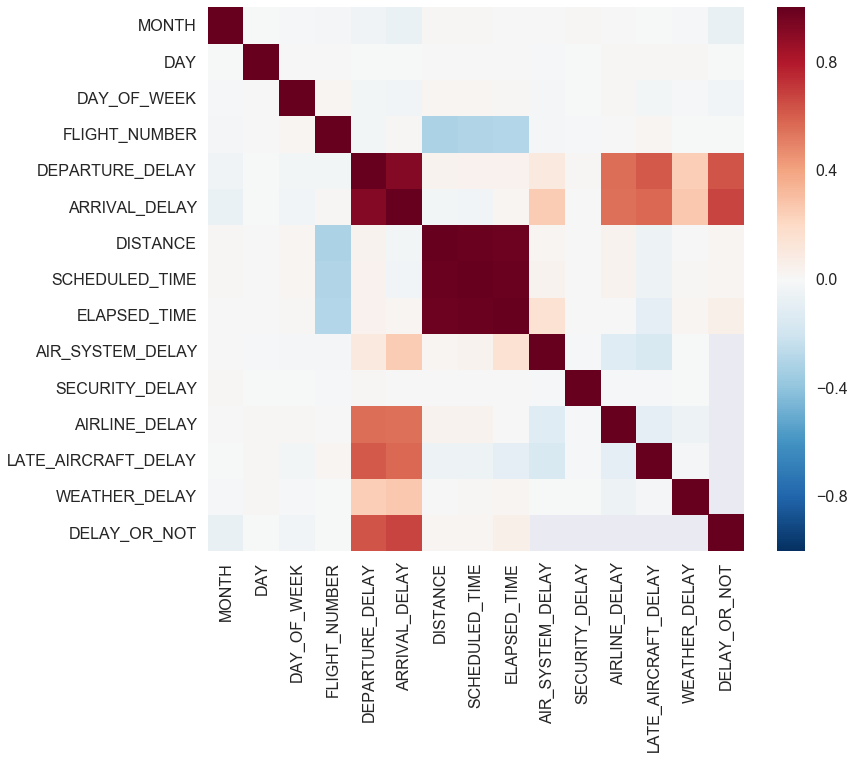

In [335]:
# heatmap of cross correlations
plt.figure(figsize=(12,10))
sns.heatmap(flight_data.corr())

### Question 3

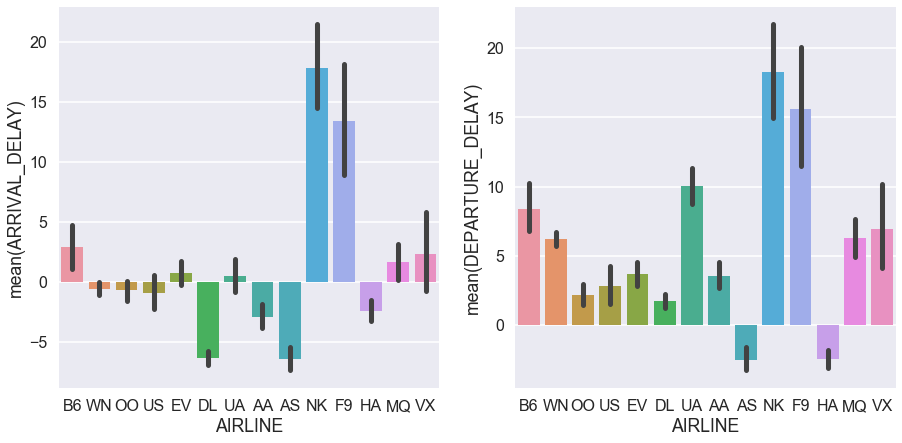

In [336]:
# mean of arrival delay vs airline
fig,ax = plt.subplots(1,2,figsize=(15,7))
sns.barplot(x='AIRLINE',y='ARRIVAL_DELAY',data = train,ax=ax[0])
sns.barplot(x='AIRLINE',y='DEPARTURE_DELAY',data = train,ax=ax[1])

In [337]:
# better histplot from pset 3
grouplist = train.groupby('AIRLINE').groups.keys()

def plot_relevant_question(dataframe, ax, labels_to_use, criteria_label, criteria, boolean_query=True):
    df = dataframe.copy()
    
    if boolean_query:
        df['column_of_interest'] = df[criteria_label].isin(criteria)
        for g, group in df.groupby('column_of_interest'):
            group['ARRIVAL_DELAY'].plot(kind='hist', ax=ax, alpha=0.3, label = labels_to_use[g])
        ax.legend(loc='best')
        
    else:
        for i, (g, group) in enumerate(df.groupby(criteria_label)):
            group['ARRIVAL_DELAY'].plot(kind='hist', ax=ax[i],color='g', bins=40, alpha=0.3, label = labels_to_use[i])
            ax[i].set_title(labels_to_use[i])
            ax[i].set_xlim(0,100)


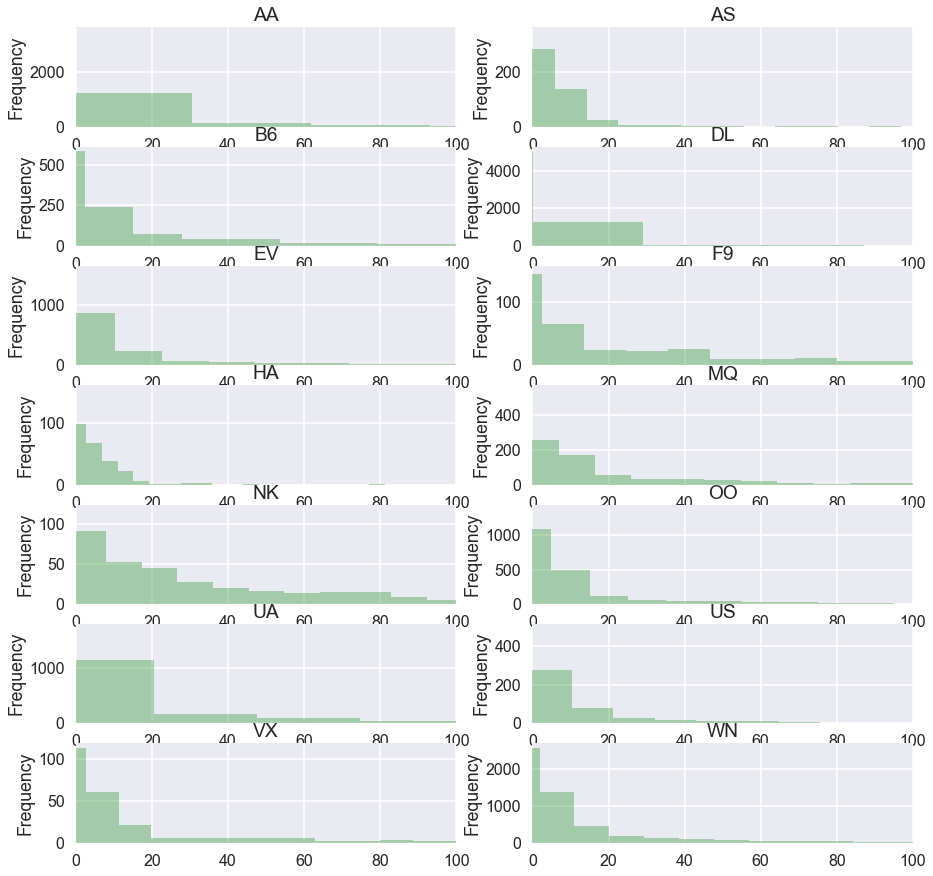

In [338]:
fig, ax = plt.subplots(7,2,figsize=(15,15))
ax = ax.flatten()
plot_relevant_question(train, ax, list(grouplist), 'AIRLINE', None, False)

In [339]:
# split time
temp = pd.DataFrame.copy(train)
time = pd.DatetimeIndex(temp['SCHED_DEP'])
# add departure delay to scheduled departure
temp['DEPARTURE_TIMEtemp'] = time.hour*60 + time.minute+ temp['DEPARTURE_DELAY']
# make time in hours
temp['DEPARTURE_TIME'] = pd.to_timedelta(temp['DEPARTURE_TIMEtemp'], unit='m')
# resplit since make time helps us avoid working with days
time = pd.DatetimeIndex(temp['DEPARTURE_TIME'])
temp['DEPARTURE_TIME1'] = time.hour*60 + time.minute


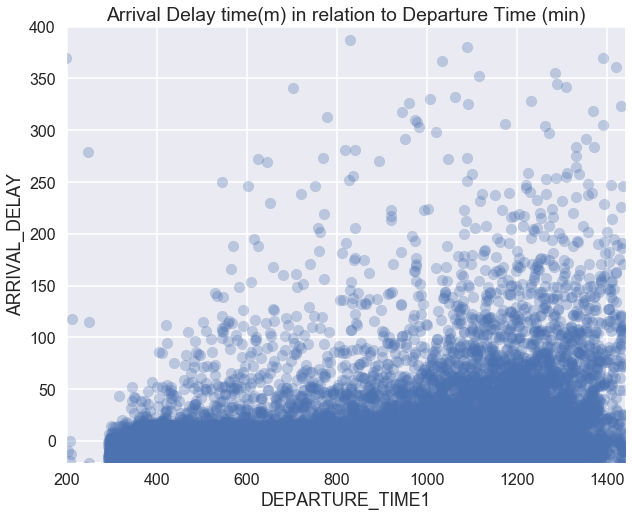

In [340]:
plt.figure(figsize=(10,8))
sns.regplot(x='DEPARTURE_TIME1',y='ARRIVAL_DELAY',data=temp,scatter_kws={'alpha':0.3},fit_reg=False)
plt.xlim([200,1440])
plt.ylim([-20,400])
plt.title('Arrival Delay time(m) in relation to Departure Time (min)')

In [341]:
zz = train.loc[train['ORIGIN_AIRPORT'].isin(['BOS','ORD','JFK','LAX','IAD','SEA'])]

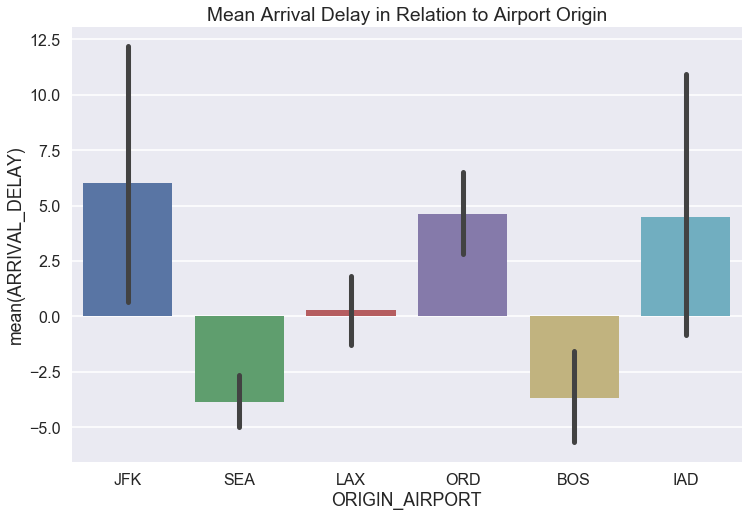

In [342]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.barplot(x='ORIGIN_AIRPORT',y='ARRIVAL_DELAY',data = zz,ax=ax)
plt.title('Mean Arrival Delay in Relation to Airport Origin')

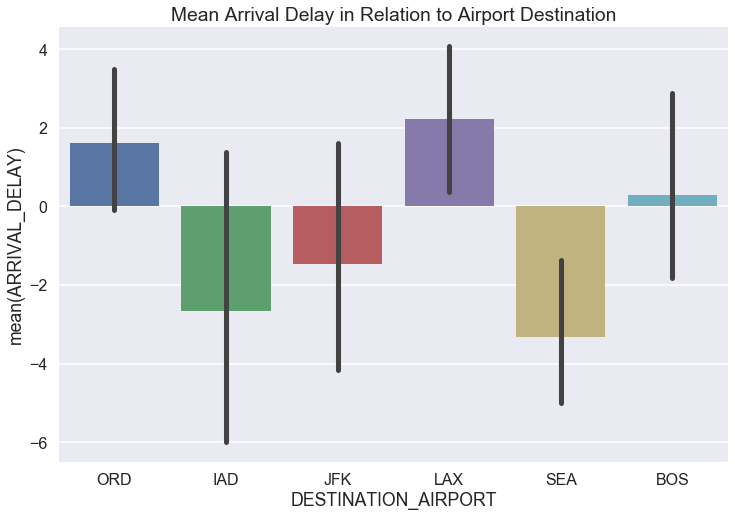

In [343]:
zz = train.loc[train['DESTINATION_AIRPORT'].isin(['BOS','ORD','JFK','LAX','IAD','SEA'])]
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.barplot(x='DESTINATION_AIRPORT',y='ARRIVAL_DELAY',data = zz,ax=ax)
plt.title('Mean Arrival Delay in Relation to Airport Destination')

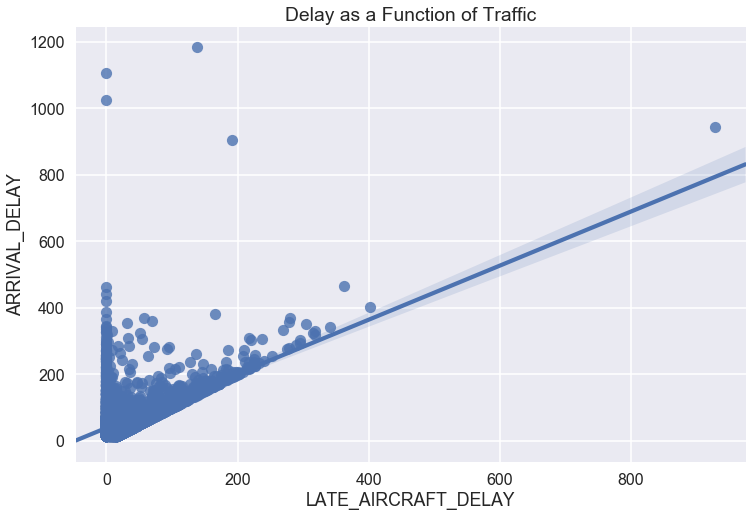

In [344]:
fig,ax = plt.subplots(1,1,figsize=(12,8))
sns.regplot(x='LATE_AIRCRAFT_DELAY',y='ARRIVAL_DELAY',data = train,ax=ax)
plt.title('Delay as a Function of Traffic')

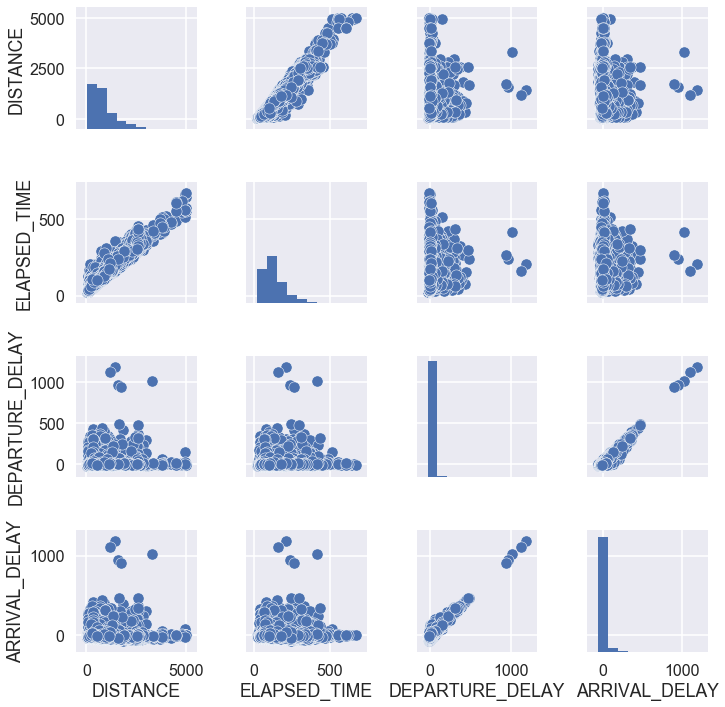

In [345]:
sns.pairplot(train[['DISTANCE','ELAPSED_TIME', 'DEPARTURE_DELAY','ARRIVAL_DELAY']])
# ax.set_xlabel(ax.get_xlabel(),fontsize=10)
# ax.set_ylabel(ax.get_ylabel(),fontsize=.1)


### Answer here

It seems to me that airline does indeed determine whether there is a delay, with NK being highly likely of having delays on average as we can see in the bar graph. Histogram is also useful because it shows us how spread out these delays are and what their count is. We can see most airlines don't delay their flights and some like AA and DL maintain low numbers, NK maintains a larger portion for different time intervals up to 100 minutes.

To determine the exact departure time, I added the delay time to the scheduled departure time. I then plotted this against arrival delay and we can see that there is a positive correlation. This makes sense as evening flights are likely to be used more often during the week and we get some delays. It also encompasses some sense of weather since night fog is an issue with flights.

Airport does seem to influence the delay. But on average, the delay at most airports falls within [-3,3] minutes (at least at the airports I looked at). This feature is interesting but may also force our model to be very high dimensional in that there are roughly 500 airports and if we include both origin and destination this would be many features with already many observations.

Late aircraft delay is a component of arrival delay so the correlation should be very strong. Why does this make sense? Well, if there is traffic at an airport then it is very likely that previous flights were delayed and this would cause arrival of a particular flight to also be delayed.

### Question 4

In [346]:
# drop columns we don't care about
# import data
flight_data = pd.read_csv('cs109a_midterm.csv')
flight_data["DELAY_OR_NOT"] = flight_data.eval('ARRIVAL_DELAY>=15')
flight_data.drop(['DATE','DAY', 'FLIGHT_NUMBER','DESTINATION_AIRPORT', 'ORIGIN_AIRPORT','TAIL_NUMBER','LATE_AIRCRAFT_DELAY', 'SCHED_ARR', 'ARRIVAL_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'WEATHER_DELAY', 'SCHEDULED_TIME', 'ELAPSED_TIME'],axis=1,inplace=True)


In [347]:
# flight_data.fillna(0,inplace=True)

In [348]:
flight_data.shape

(804941, 7)

In [349]:
# one hot encode the classes airline, origin airport and destination airport, month and dayofweek
categorical_columns = ['MONTH','DAY_OF_WEEK','AIRLINE']
flight_data = pd.get_dummies(flight_data, columns=categorical_columns, drop_first=True)

In [350]:
# pick out the hours for scheduled departure add them to delay time and create new ACTUAL DepartureTIME variable

# split time for train
time = pd.DatetimeIndex(flight_data['SCHED_DEP'])
# add departure delay to scheduled departure
temp = time.hour*60 + time.minute+ flight_data['DEPARTURE_DELAY']
# make time in hours
temp2 = pd.to_timedelta(temp, unit='m')
# resplit since make time helps us avoid working with days
time = pd.DatetimeIndex(temp2)
flight_data['DEPARTURE_TIME'] = time.hour*60 + time.minute



In [351]:
# now we need to drop sched_dep and departure delay
# flight_data = flight_data.drop(['SCHED_DEP','DEPARTURE_DELAY'],axis=1)
flight_data = flight_data.drop(['SCHED_DEP','DEPARTURE_DELAY'],axis=1)


In [352]:
# now we need to train test split and standardize

flight_data.to_pickle('fltdat')
np.random.seed(9001)
msk = np.random.rand(len(flight_data)) < 0.01
data_in = flight_data[msk]
data_out = flight_data[~msk]

np.random.seed(9001)
msk = np.random.rand(len(data_in)) < 0.5
train = data_in[msk]
test = data_in[~msk]


In [353]:
# x and y train/test split
Xtrain = train.drop('DELAY_OR_NOT',axis=1)
ytrain = train[['DELAY_OR_NOT']].values

Xtest = test.drop('DELAY_OR_NOT',axis=1)
ytest = test[['DELAY_OR_NOT']].values

Xout = data_out.drop('DELAY_OR_NOT',axis=1)
yout = data_out[['DELAY_OR_NOT']].values



In [354]:
numerical_columns = ['DEPARTURE_TIME','DISTANCE']
# only standardize the numerical columns
mean = Xtrain[numerical_columns].mean()
std = Xtrain[numerical_columns].std()

Xtrain[numerical_columns] = (Xtrain[numerical_columns] - mean)/std
Xtest[numerical_columns] = (Xtest[numerical_columns] - mean)/std
Xout[numerical_columns] = (Xout[numerical_columns] - mean)/std



In [355]:
# your code here
def step_forwards_backwards(df, response_var, direction='forward'):
    
    assert direction in ['forward', 'backward']
    
    # note that bic refers to R^2 here
    
    y = ytrain.ravel()

    predictors = set(Xtrain.columns)
    selected_predictors = set() if direction=='forward' else set(predictors)
    
    n = df.shape[0]
    best_bic = 0
    
    best_bics = []
    best_models = []
    
    if direction == 'forward':
        X = np.ones(n).reshape(-1,1)
        X = np.concatenate([X, Xtrain[list(selected_predictors)].values], axis=1)
        while (True):
            
            possible_bic_scores = []
            possible_predictors = list(selected_predictors ^ predictors)
            
            if len(possible_predictors) == 0:
                break
                
            for predictor in possible_predictors:
                
                x_temp = np.concatenate([X, Xtrain[predictor].values.reshape(-1,1)], axis=1)
                lr = LogisticRegression(fit_intercept = False)
                lr.fit(x_temp,y)
                bic = lr.score(x_temp,y)
                possible_bic_scores.append(bic)
                
            best_predictor_ix = np.argmax(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix]
            
            best_bic = np.max(possible_bic_scores)
            best_bics.append(best_bic)
            
            selected_predictors.add(best_predictor)            
            X = np.concatenate([X, Xtrain[best_predictor].values.reshape(-1,1)], axis=1)
            best_models.append(list(selected_predictors))

    else:

        while (True):
            possible_bic_scores = []
            possible_predictors = list(selected_predictors)

            if len(possible_predictors) == 0:
                break

            for predictor in possible_predictors:
                X = np.concatenate([np.ones(n).reshape(-1,1), train_df[list(selected_predictors - set([predictor]))].values], axis=1)
                model = OLS(endog=y, exog=X).fit()
                bic = model.bic
                possible_bic_scores.append(bic)

            best_predictor_ix = np.argmin(possible_bic_scores)
            best_predictor = possible_predictors[best_predictor_ix] 

            best_bic = possible_bic_scores[best_predictor_ix]
            selected_predictors.discard(best_predictor)
            
            best_bics.append(best_bic)
            best_models.append(list(selected_predictors))
            
    index_of_best_bic = np.argmax(best_bics)

    return best_models[index_of_best_bic]

In [356]:
## predictors selected
predictors_forward = step_forwards_backwards(Xtrain, 'DELAY_OR_NOT', direction='forward')
len(predictors_forward)

27

In [358]:
predictors_forward

['MONTH_6',
 'AIRLINE_US',
 'MONTH_3',
 'AIRLINE_OO',
 'MONTH_12',
 'AIRLINE_WN',
 'DEPARTURE_TIME',
 'DAY_OF_WEEK_6',
 'MONTH_10',
 'AIRLINE_EV',
 'DAY_OF_WEEK_2',
 'AIRLINE_DL',
 'MONTH_11',
 'AIRLINE_NK',
 'DAY_OF_WEEK_4',
 'MONTH_9',
 'DAY_OF_WEEK_7',
 'AIRLINE_HA',
 'MONTH_8',
 'MONTH_5',
 'AIRLINE_AS',
 'AIRLINE_MQ',
 'AIRLINE_B6',
 'MONTH_2',
 'AIRLINE_UA',
 'MONTH_7',
 'AIRLINE_VX']

In [359]:
# x and y train/test split
Xtrain = Xtrain[predictors_forward]
Xtest = Xtest[predictors_forward]
Xout = Xout[predictors_forward]



In [360]:
def rates(ytr,yhat,text):
#     print(text)
#     print('')
    model = metrics.confusion_matrix(ytr,yhat) 
#     print(model)
    tn, fp, fn, tp = model.ravel()
#     df = pd.DataFrame(np.c_[tp/(tp+fn),tn/(tn+fp),fp/(tn+fp),fn/(tp+fn)],columns=['TPR','TNR','FPR','FNR'])
    df = pd.DataFrame(np.c_[tp/(tp+fn),tn/(tn+fp),fp/(tn+fp),fn/(tp+fn)])

#     print('')
#     print('Rates:')
#     print(df)
#     print('')
    return(df)

In [361]:
# test some models
#cross validated OVR
lrcv = LogisticRegressionCV(Cs=5,fit_intercept = True)
lrcv.fit(Xtrain,ytrain.ravel())

lrcvm = LogisticRegressionCV(Cs=5,fit_intercept = True,multi_class ='multinomial')
lrcvm.fit(Xtrain,ytrain.ravel())

# lda
svd = LinearDiscriminantAnalysis(solver='svd')
svd.fit(Xtrain,ytrain.ravel())

# qda
qda = QuadraticDiscriminantAnalysis()
qda.fit(Xtrain,ytrain.ravel())



QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [362]:
# start a results table
train_acc = pd.DataFrame(np.c_[lrcv.score(Xtrain,ytrain),lrcvm.score(Xtrain,ytrain),svd.score(Xtrain,ytrain),qda.score(Xtrain,ytrain)],columns = ['Log (OvR)','Log (Multi)','LDA','QDA'])
test_acc = pd.DataFrame(np.c_[lrcv.score(Xtest,ytest),lrcvm.score(Xtest,ytest),svd.score(Xtest,ytest),qda.score(Xtest,ytest)],columns = ['Log (OvR)','Log (Multi)','LDA','QDA'])
dfmix = train_acc
dfmixtest = test_acc

In [363]:
a1 =rates(ytrain,lrcv.predict(Xtrain),'Training confusion matrix using Logistic Regression:') 
b1 =rates(ytest,lrcv.predict(Xtest),'Test confusion matrix using Logistic Regression:') 

a2= rates(ytrain,lrcvm.predict(Xtrain),'Training confusion matrix using Logistic Regression:') 
b2 =rates(ytest,lrcvm.predict(Xtest),'Test confusion matrix using Logistic Regression:') 

a3 = rates(ytrain,svd.predict(Xtrain),'Training confusion matrix using LDA:') 
b3 = rates(ytest,svd.predict(Xtest),'Test confusion matrix using LDA:') 

a4 = rates(ytrain,qda.predict(Xtrain),'Training confusion matrix using LDA:') 
b4 = rates(ytest,qda.predict(Xtest),'Test confusion matrix using LDA:') 



In [364]:
trainv = pd.DataFrame(np.c_[a1.values[0],a2.values[0],a3.values[0],a4.values[0]])
trainv.columns = ['Log (OvR)','Log (Multi)','LDA','QDA']
dfmix = pd.concat([dfmix,trainv],ignore_index=True,axis=0)
dfmix.index = ['Training Accuracy','TPR','TNR','FPR','FNR']

testv = pd.DataFrame(np.c_[b1.values[0],b2.values[0],b3.values[0],b4.values[0]])
testv.columns = ['Log (OvR)','Log (Multi)','LDA','QDA']
dfmixtest =pd.concat([dfmixtest,testv],ignore_index=True,axis=0)
dfmixtest.index = ['Testing Accuracy','TPR','TNR','FPR','FNR']

In [365]:
dfmix

,Log (OvR),Log (Multi),LDA,QDA
Training Accuracy,0.908730,0.895585,0.906994,0.752480
TPR,0.166271,0.000000,0.180523,0.653207
TNR,0.995292,1.000000,0.991692,0.764054
FPR,0.004708,0.000000,0.008308,0.235946
FNR,0.833729,1.000000,0.819477,0.346793


In [366]:
dfmixtest

,Log (OvR),Log (Multi),LDA,QDA
Testing Accuracy,0.909432,0.902177,0.909932,0.735051
TPR,0.153453,0.000000,0.179028,0.588235
TNR,0.991403,1.000000,0.989185,0.750971
FPR,0.008597,0.000000,0.010815,0.249029
FNR,0.846547,1.000000,0.820972,0.411765


In [367]:
#making ROC curves for this model using LAB7 code (RAHUL)

from sklearn.metrics import roc_curve, auc
import seaborn as sns
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    # for zeros
    if clf == 1:
        fpr, tpr, thresholds=roc_curve(ytest, np.zeros(np.shape(ytest)))
    #for stuff like logistic regression
    elif proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    #for stuff like svm
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        #ax.plot([0, 1], [0, 1], '--k',alpha = 0.3,label ='ROC curve for zero pred (area = 0.5)')
        #ax.plot(0, 0,alpha = 0.3,c='r',label ='ROC curve for zero pred (area = 0)')
        ax.set_xlim([-0.1, 1.0])
        ax.set_ylim([-0.1, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax



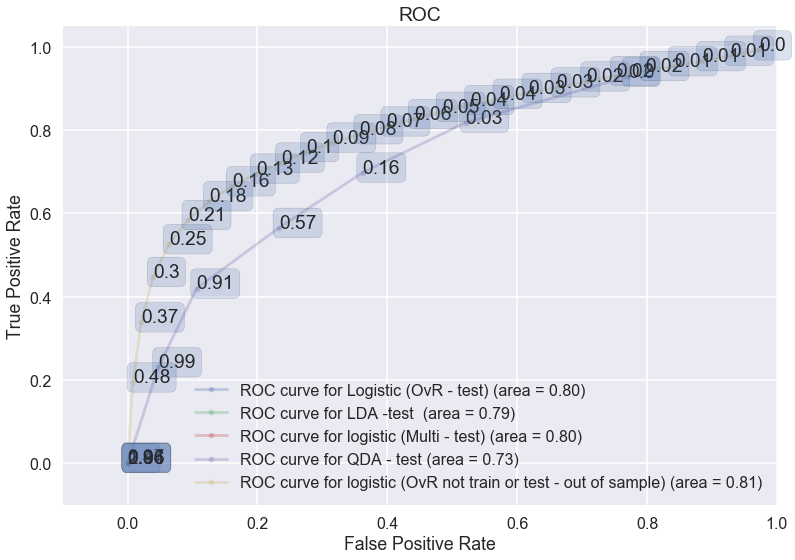

In [368]:
sns.set_context("poster")
ax=make_roc("Logistic (OvR - test)",lrcv, ytest, Xtest, labe=1000, skip=1000)
ax=make_roc("LDA -test ",svd, ytest, Xtest, labe=1000, skip=1000)
ax=make_roc("logistic (Multi - test)",lrcvm, ytest, Xtest, labe=1000, skip=1000)
ax=make_roc("QDA - test",qda, ytest, Xtest, labe=100, skip=100)
ax=make_roc("logistic (OvR not train or test - out of sample)",lrcv, yout, Xout, labe=10000, skip=10000)



### Question 5

We notice that our models do relatively well in predicting delays. The main features that contributed to this were determined using forward selection. The result of which returned features (see table above) such as Month_6 (June) and DEPARTURE_TIME which make a lot of intuitive sense. Later flights generally have more delays and summer months are likely to see more traffic and delays too. AIRLINE US and NK were also picked out by feature selection indicating that airlines can be used to predict the possibility of delay which goes back to our original point of - if you go on a budget airline, they likely face longer delays.

Note: I ran this model with the inclusion of origin destination and found that the ROC curves were roughly the same. In fact, svd ran into some errors due to multicollinearity.

Further Note: Our goal was to classify arrival delays. The easiest route in doing so is by taking features such as late_aircraft_delay which are the fundamental components of arrival_delay. However, doing so isn't shedding light on anything new, in fact, we may not have this kind of data in real life. For example, a delta flight leaves from O'haire at 2pm on saturday, can we predict whether it will be delayed seems reasonable. Throwing in information about systems delay, weather delay means i'm not really predicting anything and i'm using information about the delay apriori. However, I wanted to see what would happend if for some reason I had one of these features. I ran the model and got an ROC of 0.89 for most of the models. Clearly, this is consistent with our expectation and this explanation. But it is precisely for this reason I choose not to use that information.


### Question 6

In [369]:
ypred = lrcv.predict(Xout)

In [370]:
ypred.shape

(796912,)

In [371]:
# now we need to train test split and standardize
# import data
flight_data1 = pd.read_csv('cs109a_midterm.csv')
# create delay_or_not boolean
flight_data1["DELAY_OR_NOT"] = flight_data1.eval('ARRIVAL_DELAY>=15')

np.random.seed(9001)
msk = np.random.rand(len(flight_data)) < 0.01
data_in = flight_data1[msk]
data_out = flight_data1[~msk]

np.random.seed(9001)
msk = np.random.rand(len(data_in)) < 0.5
train = data_in[msk]
test = data_in[~msk]


In [372]:
data_out['ypred'] = ypred.ravel()

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [373]:
zz = data_out.groupby('AIRLINE')['ypred','DELAY_OR_NOT'].agg('sum')

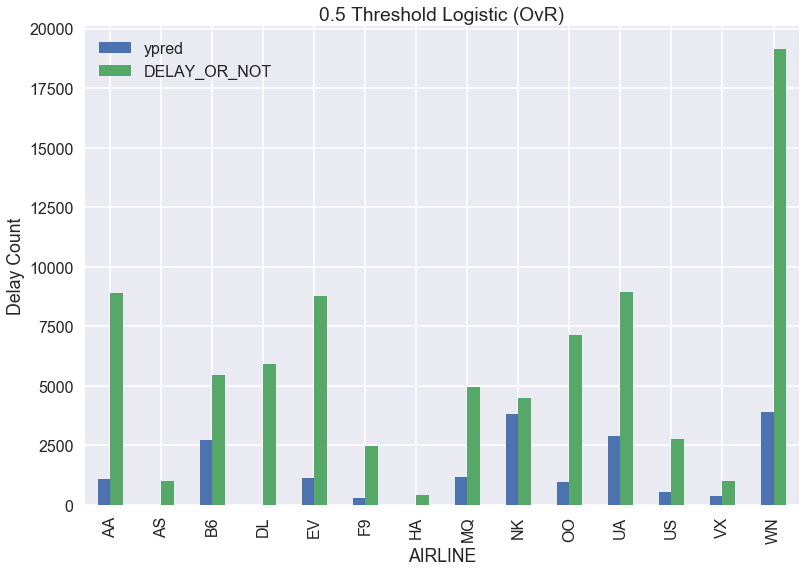

In [374]:
plt.figure()
zz.plot.bar()
plt.title('0.5 Threshold Logistic (OvR)')
plt.ylabel('Delay Count')

### PLEASE READ THIS
We predict NK is the most delayed followed by WN and UA and B6. F9,MQ and OO are next and so on. I plot the actual delay counts vs the predicted. Remember that because we are using a threshold of 0.5, we don't get very good results. However, as we saw on our ROC, if we set the threshold to 0.8, then we can get better results since we can keep the FPR low while increasing the TPR. I do that here:

In [375]:
((lrcv.predict_proba(Xout))[:,1]).shape

(796912,)

In [376]:
data_out.shape

(796912, 23)

C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


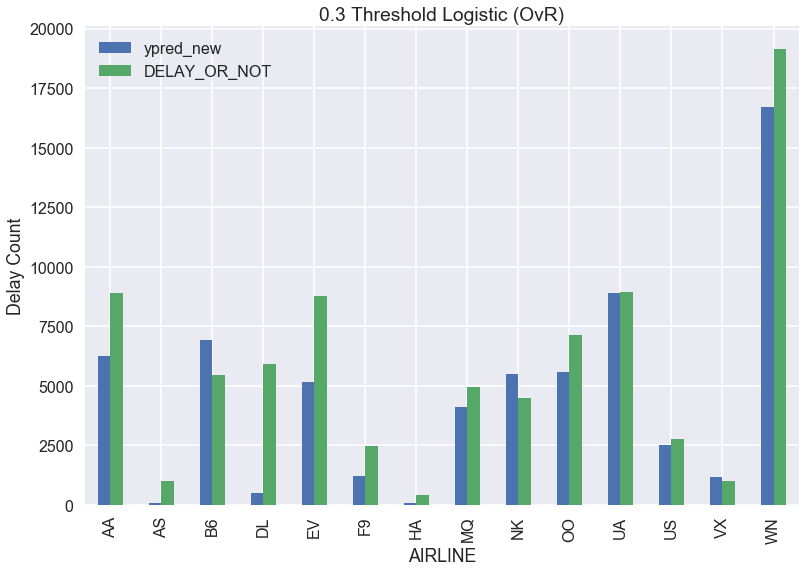

In [377]:
yx = (lrcv.predict_proba(Xout))[:,1]
data_out['ypred_new'] = yx
data_out["ypred_new"] = data_out.eval('ypred_new>=0.3')*1

zz = data_out.groupby('AIRLINE')['ypred_new','DELAY_OR_NOT'].agg('sum')
zz.plot.bar()
plt.title('0.3 Threshold Logistic (OvR)')
plt.ylabel('Delay Count')

So by using our ROC curves, we were able to determine a sense of the threshold and thus use this threshold to predict the number of delays in our left out test set. We can see here that we are doing pretty well in relation to the actual classification. WN, UA, B6 still at the top.

### Question 7

I wanted a larger train test split since if I use my old one, I get a very small training set. If we have the DATA - I think we should use it! Therefore, I create a new train test split using the features developed in q4. 

In [378]:
# read in the matrix with features we calculated above
df = pd.read_pickle('fltdat')
flight_data1 = pd.read_csv('cs109a_midterm.csv')
# readd column
df['ARRIVAL_DELAY'] = flight_data1['ARRIVAL_DELAY']

In [379]:
# now we need to train test split and standardize (want a different size split here since we had fewer training samples!)

np.random.seed(9001)
# note change in percentage of data
msk = np.random.rand(len(df)) < 0.1
data_in = df[msk]
data_out = df[~msk]

np.random.seed(9001)
msk = np.random.rand(len(data_in)) < 0.5
train = data_in[msk]
test = data_in[~msk]


In [380]:
# standardize
numerical_columns = ['DEPARTURE_TIME','DISTANCE']
# only standardize the numerical columns
mean = train[numerical_columns].mean()
std = train[numerical_columns].std()

train[numerical_columns] = (train[numerical_columns] - mean)/std
test[numerical_columns] = (test[numerical_columns] - mean)/std
data_out[numerical_columns] = (data_out[numerical_columns] - mean)/std




C:\Users\Shaan Desai\Anaconda3\lib\site-packages\pandas\core\frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [381]:
Xtrain = train[train['DELAY_OR_NOT']==True]
Xtest = test[test['DELAY_OR_NOT'] == True]
Xout = data_out[data_out['DELAY_OR_NOT'] == True]


In [382]:
Xtrain.drop('DELAY_OR_NOT',axis=1,inplace=True)
Xtest.drop('DELAY_OR_NOT',axis=1,inplace=True)
Xout.drop('DELAY_OR_NOT',axis=1,inplace=True)


C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Shaan Desai\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [383]:
X_train = Xtrain.drop('ARRIVAL_DELAY',axis=1)
y_train = np.log(Xtrain['ARRIVAL_DELAY'])
X_test = Xtest.drop('ARRIVAL_DELAY',axis=1)
y_test = np.log(Xtest['ARRIVAL_DELAY'])
linreg = LinearRegression(fit_intercept = True)
lassr = LassoCV(fit_intercept = True)
ridge = RidgeCV(fit_intercept = True)



log(R^2) =0.021882737113


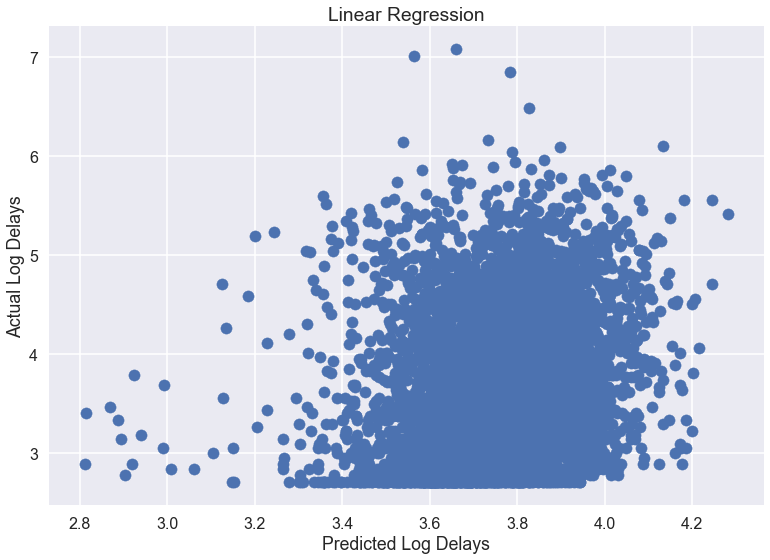

In [384]:
linreg.fit(X_train,y_train)
yhat = linreg.predict(X_test)
plt.scatter((yhat),y_test)
print('log(R^2) =%s' %((linreg.score(X_test,y_test))))
plt.xlabel('Predicted Log Delays')
plt.ylabel('Actual Log Delays')
plt.title('Linear Regression')

log(R^2) =0.0243983787708


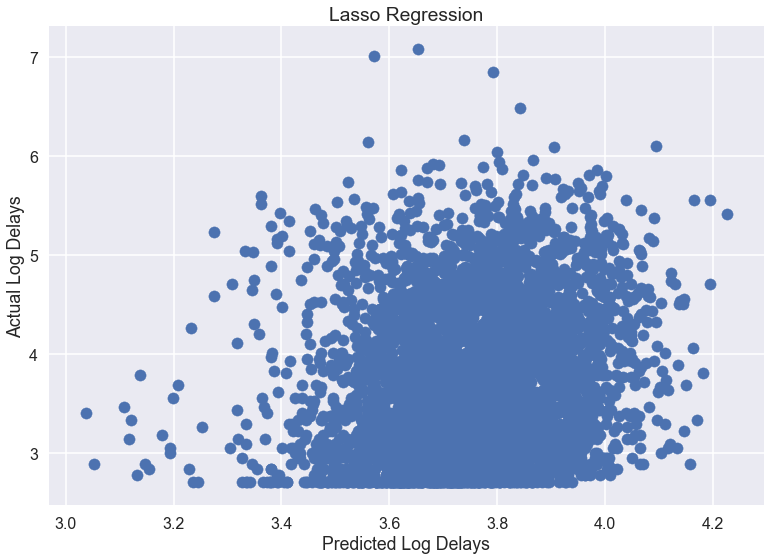

In [385]:
lassr.fit(X_train,y_train)
yhat = lassr.predict(X_test)
plt.scatter((yhat),y_test)
print('log(R^2) =%s' %(lassr.score(X_test,y_test)))
plt.xlabel('Predicted Log Delays')
plt.ylabel('Actual Log Delays')
plt.title('Lasso Regression')

log(R^2) =0.0238289955758


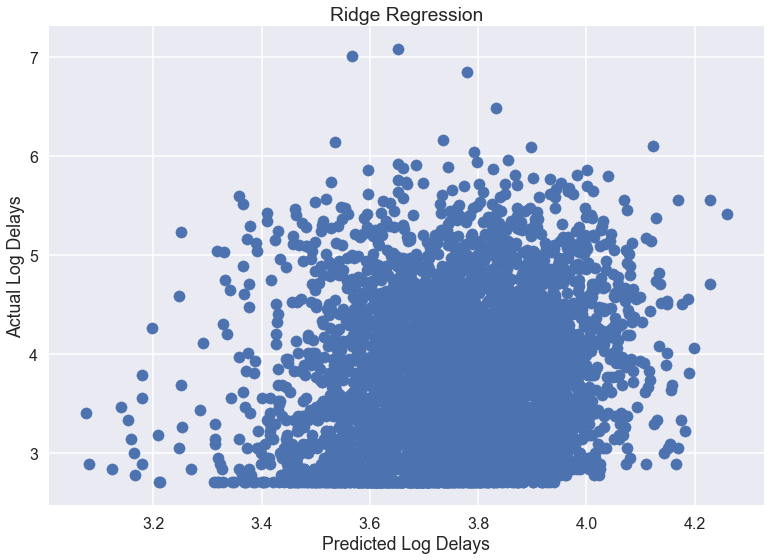

In [386]:
ridge.fit(X_train,y_train)
yhat = ridge.predict(X_test)
plt.scatter((yhat),y_test)
print('log(R^2) =%s' %((ridge.score(X_test,y_test))))
plt.xlabel('Predicted Log Delays')
plt.ylabel('Actual Log Delays')
plt.title('Ridge Regression')

In [387]:
X_out = Xout.drop('ARRIVAL_DELAY',axis=1)
y_out = np.log(Xout['ARRIVAL_DELAY'])
print('Lasso out of sample R^2 = %s'%lassr.score(X_out,y_out))

Lasso out of sample R^2 = 0.0257205296341


### Note:

So what do we notice? We see that all our usual models aren't performing well in this part of the model (since we want an R^2 above 0.3). So what can we do? well we can add interaction terms and polynomial terms. Then we can down select using PCA and re run our model!

In [388]:
# One interaction term
X_train['new'] = X_train['DEPARTURE_TIME']*X_train['DISTANCE']
X_test['new'] = X_test['DEPARTURE_TIME']*X_test['DISTANCE']
X_out['new'] = X_out['DEPARTURE_TIME']*X_out['DISTANCE']


In [389]:
lassr.fit(X_train,y_train)
print('Lasso Regression Train R^2 = %s' %lassr.score(X_train,y_train))

Lasso Regression Train R^2 = 0.0528363208824


In [390]:
print('Lasso Reg R^2 on real test set = %s'%lassr.score(X_out,y_out))

Lasso Reg R^2 on real test set = 0.0268066654232


So we added the term and things got better, lets use polynomial features to get more complex features

In [391]:
poly = PolynomialFeatures(2,include_bias=False)
xtrpol = poly.fit_transform(X_train)
xtstpol = poly.fit_transform(X_test)
xoutpol = poly.fit_transform(X_out)

In [392]:
lassr.fit(xtrpol,y_train)
print('Train score with complex features = %s' %lassr.score(xtrpol,y_train))

Train score with complex features = 0.118146814239


In [393]:
print('Test score with complex features = %s' %lassr.score(xtstpol,y_test))

Test score with complex features = 0.0664095598954


In [394]:
print('out of sample score with complex features = %s' %lassr.score(xoutpol,y_out))

out of sample score with complex features = 0.0846232989356


log(R^2) =0.0846232989356


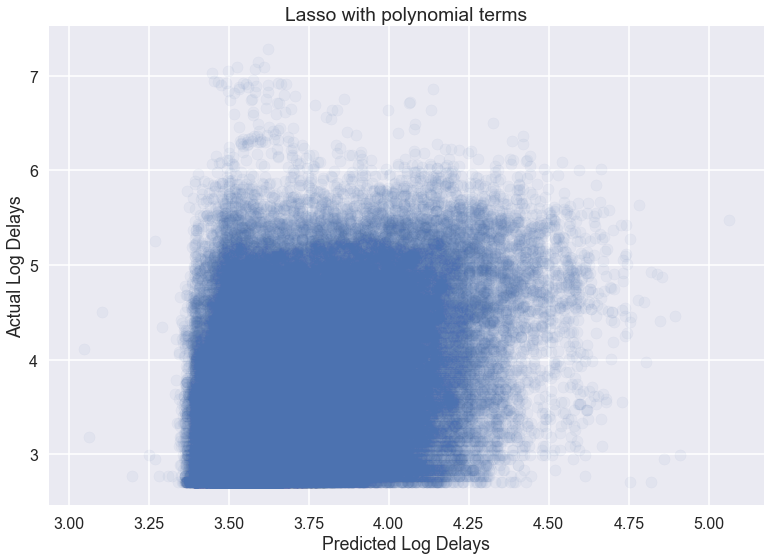

In [395]:
yhat = lassr.predict(xoutpol)
plt.scatter((yhat),y_out,alpha=0.05)
print('log(R^2) =%s' %((lassr.score(xoutpol,y_out))))
plt.xlabel('Predicted Log Delays')
plt.ylabel('Actual Log Delays')
plt.title('Lasso with polynomial terms')

So we can see that we are really improving performance here by including these complex features. Lets see if PCA does anything to help us

(0, 100)

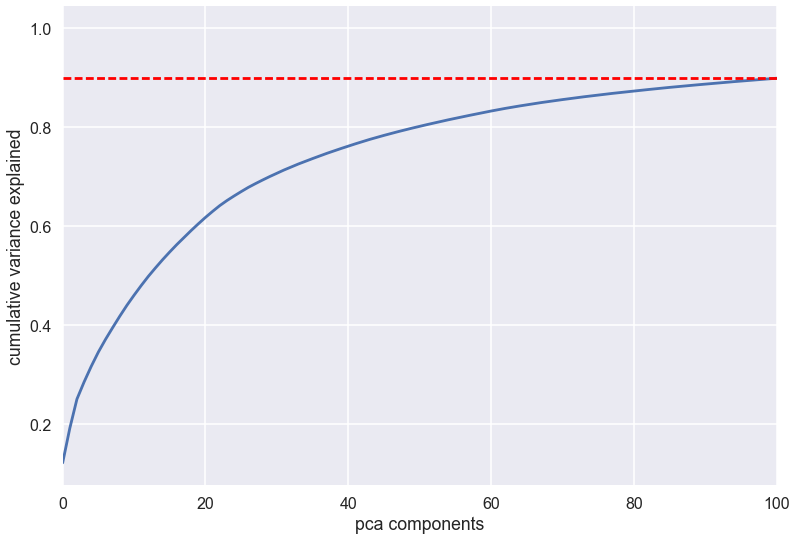

In [396]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
X_normalizedtr = preprocessing.normalize(xtrpol, norm='l2')
X_normalizedtst = preprocessing.normalize(xtstpol, norm='l2')
X_normalizedout = preprocessing.normalize(xoutpol, norm='l2')

pca = PCA()
pca.fit(X_normalizedtr)
var_c = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(var_c)), var_c)
plt.axhline(0.9,ls='--',color='red')
plt.xlabel("pca components")
plt.ylabel("cumulative variance explained");
plt.xlim([0,100])

In [397]:
X_normalizedtr = preprocessing.normalize(xtrpol, norm='l2')
X_normalizedtst = preprocessing.normalize(xtstpol, norm='l2')

pca = PCA(n_components=100)
pca.fit(X_normalizedtr)
X_train_pca = pca.transform(X_normalizedtr)
X_test_pca = pca.transform(X_normalizedtst)

for i in range(20):
    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train_pca[:,0:i+1], (y_train))
    print('Train R^2: {}'.format(regression_model.score(X_train_pca[:,0:i+1],(y_train))))
    print('Test R^2: {}'.format(regression_model.score(X_test_pca[:,0:i+1], (y_test))))

Train R^2: 0.003879563513195517
Test R^2: 0.006571811815045403
Train R^2: 0.04166635916402395
Test R^2: 0.043485495003265484
Train R^2: 0.045539891304601676
Test R^2: 0.044733964653118186
Train R^2: 0.07377239728665363
Test R^2: 0.05187671423814799
Train R^2: 0.07594713934929331
Test R^2: 0.0536162862798082
Train R^2: 0.07595066025687958
Test R^2: 0.053678769221091945
Train R^2: 0.07609542506237366
Test R^2: 0.053718121015306264
Train R^2: 0.07656175132987075
Test R^2: 0.05369758784900302
Train R^2: 0.07684333824348344
Test R^2: 0.053952028060439194
Train R^2: 0.07955845783974269
Test R^2: 0.054668852286233194
Train R^2: 0.07974591277438792
Test R^2: 0.054256080118644585
Train R^2: 0.08027904770171035
Test R^2: 0.05429433388664473
Train R^2: 0.08053213082876809
Test R^2: 0.0537796503911353
Train R^2: 0.08053792330311182
Test R^2: 0.05383799928732891
Train R^2: 0.08054647553952787
Test R^2: 0.05366869869224922
Train R^2: 0.08093407073096925
Test R^2: 0.05308634798743417
Train R^2: 0.080

In [398]:
X_normalizedout = preprocessing.normalize(xoutpol, norm='l2')
xout_pca = pca.transform(X_normalizedout)

In [399]:
regression_model.fit(xout_pca,y_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [400]:
regression_model = LinearRegression(fit_intercept=True)
regression_model.fit(X_train_pca, (y_train))
print('100 PCA components out of sample R^2 = %s'%regression_model.score(xout_pca,y_out))

100 PCA components out of sample R^2 = 0.0501546721202


So we find that 100 pca components with simple linear regression gets us an out of sample score of 0.05 but we use far fewer features than LASSO with all the polynomial/interaction features. There is always a trade off between accuracy and computation time and this is a clear example of this.

### Question 8

** Introduction **

In this problem we set out to build a classification model and a regression model to determine arrival delays. Before we could formally engage with the predictive models we wanted to understand our feature space. With the 31 features provided, we noticed that many of our features were collinear, for example date and day, month. To avoid this collinearity we list out the columns we wanted to drop in question 2. While the problem statement had some freedom in interpretation, I wanted to mention that good predictive models are ones that can use as little information as possible and still generate good results. Based on this, I chose not to use security_delay, weather_delay and the other composite pieces of arrival_delay precisely because their inclusion means knowing something about the answer. In essence, I wanted to predict a delay without knowing whether the security_delay was 5 mins and the late_aircraft_delay was 2mins. Rather, I wanted to answer a question such as - if I have a plane leaving O'haire at 5pm on Thursday and it is a Delta flight - will it be delayed? Such a model would be useful in helping ground staff at the destination airport predict whether it will be delayed and if so the delay time.


** Visualization **

With a clearer question at hand I then use EDA and generated plots to see how airport, airline, traffic, departure time and distance affect the arrival delay time. We noticed that airlines had a lot of variance in delay time across each other, whereas airport (at least the major ones) had little difference in delay time as can be seen in the figures below.

![Airline Mean Delay Time](fig1.jpg) 

Using these visualizations helped us decide on the features we wanted. I chose to use departure time = scheduled departure + departure delay, airlines, month, distance and day of week since these showed correlations and seemed intuitively predictive. Furthermore, we did not include origin/departure destination since our visualization showed that there isn't a lot of variance.

** Classification Model **

So with our features we did the following
1. we created departure time and made sure it was in minutes between [0,1440]. 
2. We hot encoded airlines, month and day of week and dropped one column in each to avoid collinearity. We need to hot encode otherwise we would be assuming our data isn't categorical. 
3. We then do a train test split where we randomly take 1% of the dataset, roughly 8000 samples,  and then split this 1% into halves and call them train and test. This gave us 3 sets of data, a train, test and out of sample set.
4. We then standardize our continuous variables by fitting to the training set and the transforming the test and out of sample with the means/stds of the training set. 
5. We then had many features, so I chose to use forward selection to pick out the best features by optimizing the training R^2. This would also help us determine the important features.
6. Using this set we fit a cross validated logistic (OvR and Multinomial), LDA and QDA regression (KNN was memory expensive here so I didn't use it because it is not so useful here)
7. I generate tables reporting the training and test accuracy of each model and then plot an ROC curve for each


We notice that in plotting these ROC's that most of the models generate an AUC of 0.8 with QDA performing poorer at 0.74 as can be seen here:

![Airline Mean Delay Time](fig3.jpg) 

We thus perform better than the 0.6 base model expectation and have found thresholds that are able to give us good TPR values while maintaining low FPR. Note that out of interest I tested the addition of the feature late_aircraft_delay to see what would happen and the result was an AUC of 0.89 of all models - this was expected since that feature makes up arrival_delay. I dealt with missingness in that case by using 0 imputation since many flights in general aren't delayed. We then do 2 things, firstly we use the logistic regression to predict delay or not using the general 0.5 threshold. Secondly, we use the predict_proba to use a threshold of 0.3 which should generate better results. We use Logistic regression since it performs the best. The result of this was the plot:

![Airline Mean Delay Time](fig4.jpg) 

The Delay or Not represents the number of true delays while the ypred is the number of predicted delays.

Thus, in using the ROC curve and finding the threshold, we can predict most of the delays really well for most airlines, in some cases there is under/over prediction but finding the threshold on our validation set and then using it on our out of sample true test set gives us good results.


** Regression Model - Log Delay Prediction **

The next step was to determine the log of the actual delay time. One thing to note is that many of the observations aren't delays so using our train/test split from above would give us very few training samples to learn from. To avoid this I use the same features created above but change the sample set to 10% instead of 1%. This would allow for more training samples where the delay >= 15. 

I then try out 3 different regressions, linear, lasso and ridge. I make sure I use cross validation since this will help me choose the best parameters for the training fit. I then tested these out on our small test set and got poor results, e.g. R^2 of 0.024 roughly. So, I decided to include interaction terms and polynomial terms. This then drastically improved my performance and got me to an out of sample R^2 of 0.08. This was great but I had lots of features, so I normalized my features and then used pca to determine 90% of the variance in the data which led to 100 features. I then use these pca components and was able to generate an R^2 of 0.05 with a simple linear regression indicating that with fewer features I was still able to get good results.

![Airline Mean Delay Time](fig5.jpg) 

** Conclusion **

We asked ourselves whether we could classify delays and if we did have delays how long they would be. I framed this further by saying, can I predict these using departure time, airline, month, day of week and distance. Using other features such as late_aircraft_delay and the other components of arrival_delay to me didn't seem appropriate for our case but I also tested the model with the inclusion of these features and found slightly improved performance. Yet the main take away here is that our intuition about months, days of the week and departure time/airline are well represented by the data. In fact, we can predict delays to a decent level of accuracy using these features. Our AUC on the left out test set was 0.8 with logistic regression cross validated (OvR) and our regression fit had an R^2 of 0.08 on the log scale with cross validated lasso regression. 
